In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def show_images(images, labels):
    fig, axes = plt.subplots(5, 5)
    fig.subplots_adjust(hspace=0, wspace=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap='binary')
        ax.text(0.05,0.05,(str(np.argmax(labels[i]))),transform=ax.transAxes, color='green')
        ax.set_xticks([])
        ax.set_yticks([])

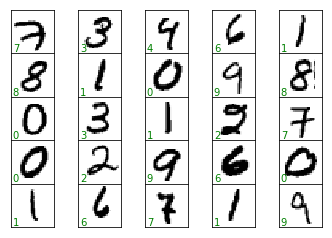

In [3]:
images = mnist.train.images
labels = mnist.train.labels
show_images(images,labels )

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

In [6]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

In [7]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [8]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [9]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [10]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [11]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [12]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [13]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [14]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        with sess.as_default():
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
            print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

step 0, training accuracy 0.18
test accuracy 0.1038
step 100, training accuracy 0.18
test accuracy 0.1125
step 200, training accuracy 0.18
test accuracy 0.0911
step 300, training accuracy 0.08
test accuracy 0.1084
step 400, training accuracy 0.1
test accuracy 0.1368
step 500, training accuracy 0.04
test accuracy 0.1354
step 600, training accuracy 0.18
test accuracy 0.1395
step 700, training accuracy 0.16
test accuracy 0.1526
step 800, training accuracy 0.2
test accuracy 0.1735
step 900, training accuracy 0.06
test accuracy 0.1985
step 1000, training accuracy 0.14
test accuracy 0.1929
step 1100, training accuracy 0.26
test accuracy 0.1842
step 1200, training accuracy 0.12
test accuracy 0.183
step 1300, training accuracy 0.14
test accuracy 0.1961
step 1400, training accuracy 0.1
test accuracy 0.2123

test accuracy 0.8857
step 14300, training accuracy 0.88
test accuracy 0.8864
step 14400, training accuracy 0.88
test accuracy 0.8855
step 14500, training accuracy 0.9
test accuracy 0.8865
step 14600, training accuracy 0.86
test accuracy 0.8861
step 14700, training accuracy 0.84
test accuracy 0.8847
step 14800, training accuracy 0.86
test accuracy 0.8833
step 14900, training accuracy 0.8
test accuracy 0.8829
step 15000, training accuracy 0.84
test accuracy 0.8834
step 15100, training accuracy 0.9
test accuracy 0.8863
step 15200, training accuracy 0.86
test accuracy 0.8899
step 15300, training accuracy 0.86
test accuracy 0.8906
step 15400, training accuracy 0.88
test accuracy 0.8915
step 15500, training accuracy 0.82
test accuracy 0.8907
step 15600, training accuracy 0.86
test accuracy 0.8886
step 15700, training accuracy 0.84
test accuracy 0.8853
step 15800, training accuracy 0.96
test accuracy 0.8836
step 15900, training accuracy 0.88
test accuracy 0.8821
step 16000, training accuracy 

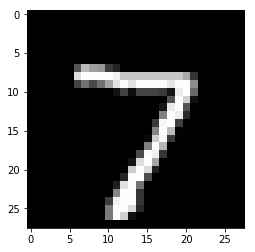

In [15]:
imageFormat = mnist.test.images[0]
plt.imshow(np.reshape(imageFormat,[28,28]), interpolation="nearest", cmap="gray")

In [16]:
def activImage(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotImages(units)

In [17]:
import math
def plotImages(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

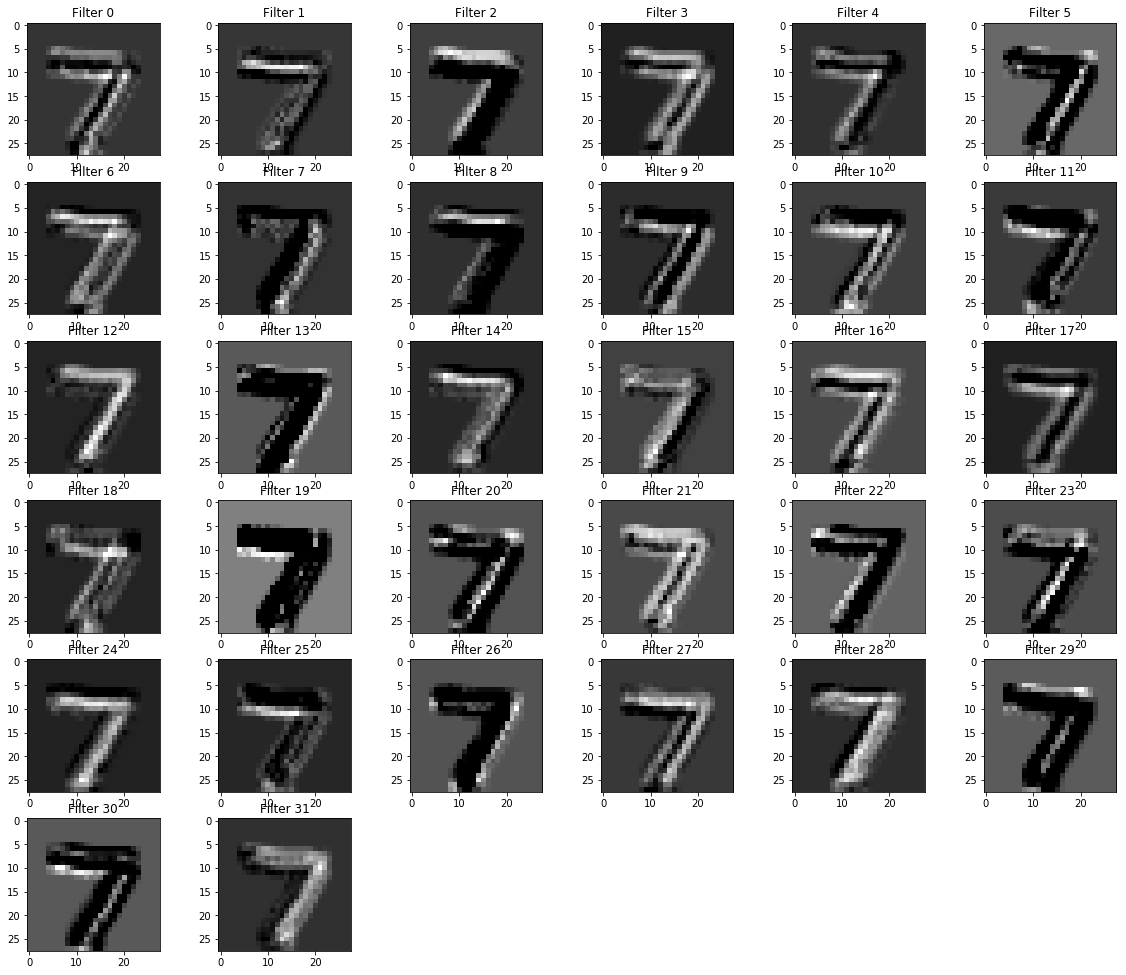

In [18]:
activImage(h_conv1,imageFormat)

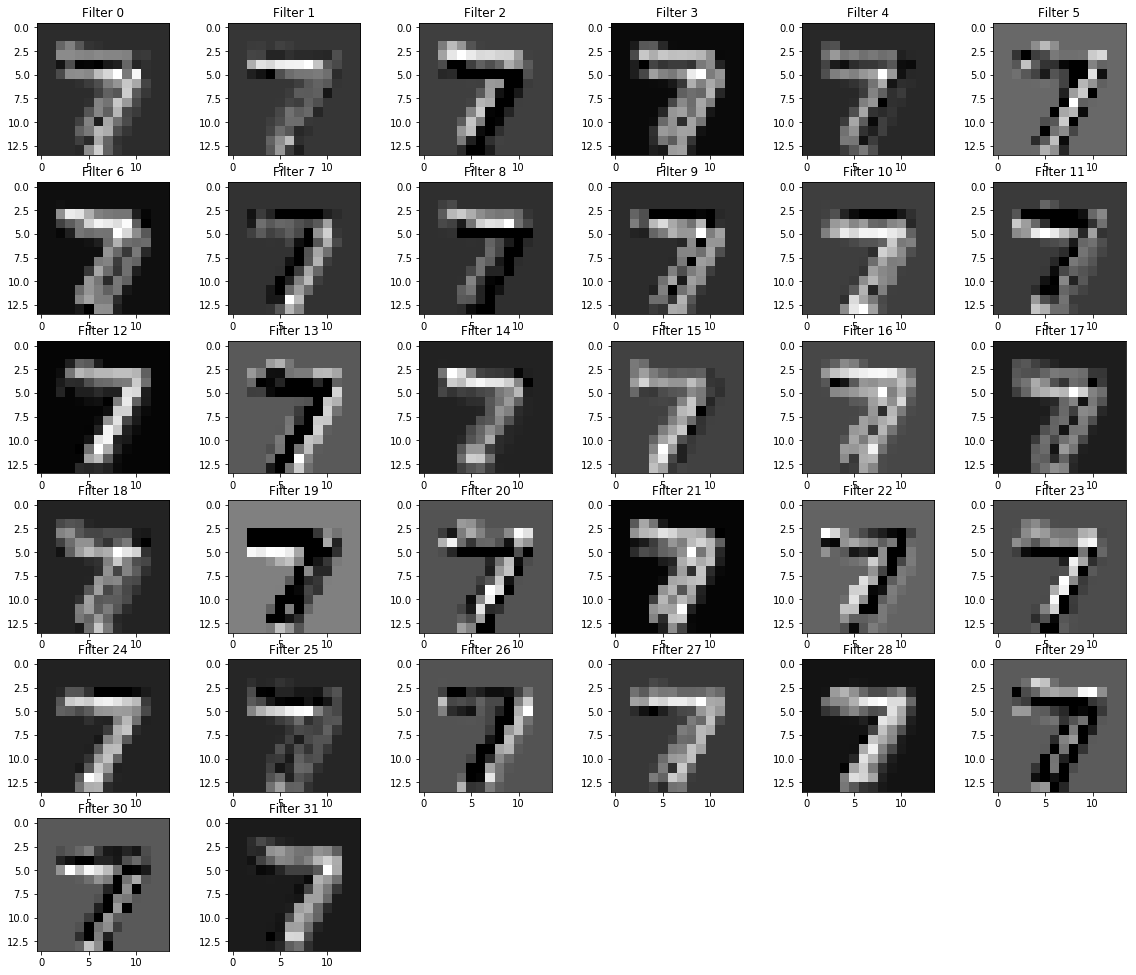

In [19]:
activImage(h_pool1,imageFormat)